#### Thinking 1: 既然内容相似度计算简单，能频繁更新，为什么还需要协同过滤算法呢？  
> 回答：
> - **content based**的计算虽然相对简单，能够频繁更新，但是在推荐过程中无法为用户建立档案，而且很难找到有效的特征。同时，对于现实场景来讲，用户可能会有多种兴趣，单纯content based有可能无法跳出用于分析的内容的范围，很难解决EE问题
> - **协同过滤**是针对用户的历史行为进行分析，不需要对浏览内容深入了解，泛用性应该会更高。同时，该算法可以一定程度上解决EE问题，在客户推荐上带来一些惊喜（explore）。但是协同过滤还是得考虑冷启动的问题，如果没有足够的item/user数据，则无法做到很好的协同过滤。
> 综上，content based和系统过滤应该根据场景结合使用。 


#### Thinking 2：定向广告和搜索广告的区别是什么，在解决方案上会有怎样的不同?  
> 回答：
> - **定向广告**是在用户浏览网页时，算法根据用户当前浏览网页的关键词进行匹配检索对应的广告，并推送给客户。定向广告既可以通过上下文的关键字检索，也可以通过为用户的行为属性打标签，推荐对应的广告。  
> - **搜索广告**是通过分析用户搜索的需求，通过召回、粗排、精排、竞价、截断等步骤筛选出与用户搜索相关度高的top n个广告展示出来


#### Thinking 3：如果给一个视频打标签，视频中有音乐作为背景音乐，采用了NLP方式对内容自动打标签，可能存在什么问题？
> 回答：  
> 针对视频内容，标签更关心的是视频的内容展现了山么。如果通过NLP的方式自动打标签，可能会被背景音乐干扰，同时，并不是所有视频都有有意义的语音，所以单纯用NLP进行视频标签的可行性不大，应结合cv的方式  



### Action 1: 采用CART决策树对MNIST进行分类

In [43]:
# -*- coding: utf-8 -*-
# 使用 CART 决策树进行MNIST手写数字分类

import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
digits = load_digits()
data = digits.data

In [34]:
type(digits), type(data)

(sklearn.utils.Bunch, numpy.ndarray)

Label =  0


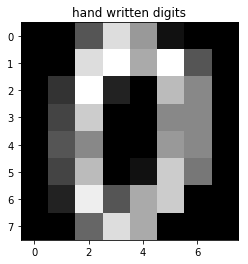

In [30]:
plt.gray()
print("Label = ", digits.target[0])
plt.title("hand written digits")
plt.imshow(digits.images[0])
plt.show()

In [39]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)


In [134]:
clf = DecisionTreeClassifier(criterion = 'gini', min_samples_split=4)
clf.fit(train_ss_x, train_y)
prediction = clf.predict(test_ss_x)
print("准确率 = {:.4f}".format(accuracy_score(test_y, prediction)))

准确率 = 0.8600


 </br>   
  
### Action 2： Avazu CTR广告点击率预测  


**说明**：  
> - 先用了lgbm做了一次fit，数据基本没怎么处理，得到的结果是0.41左右  
> - 第二轮处理了数据，把unique值特别多的feature去掉了，发现效果下降到0.45左右  
> - 第三轮做了标准化，和第一轮比变化不大  
> - 最后一轮用了 lr 模型  


In [35]:
import pandas as pd
import numpy as np
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
path = os.getcwd()

In [75]:
data = pd.read_csv(path+"//train_sample.csv")

In [9]:
data.columns

Index(['Unnamed: 0', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [3]:
data.describe()

,Unnamed: 0,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,10000.00000,1.000000e+04,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,9.795641e+18,0.170600,14102100.0,1005.059900,0.195900,1.068200,0.204500,17711.693800,318.478000,56.986400,1967.605900,0.789500,125.622400,37746.299500,88.260300
std,2886.89568,2.853038e+18,0.376178,0.0,1.103193,0.404895,0.601984,0.646469,3139.296362,11.492429,37.425508,385.160315,1.228878,234.039047,48516.401341,45.153569
min,0.00000,1.004777e+16,0.000000,14102100.0,1001.000000,0.000000,0.000000,0.000000,375.000000,216.000000,36.000000,112.000000,0.000000,35.000000,-1.000000,13.000000
25%,2499.75000,1.024754e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,15704.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,4999.50000,1.063018e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,17654.000000,320.000000,50.000000,1993.000000,0.000000,35.000000,-1.000000,79.000000
75%,7499.25000,1.100749e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,20362.000000,320.000000,50.000000,2307.000000,2.000000,39.000000,100083.000000,117.000000
max,9999.00000,1.138513e+19,1.000000,14102100.0,1010.000000,5.000000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


In [76]:
# 查看每个字段的唯一值数量
columns = data.columns
dict(zip(columns, [data[x].unique().size for x in columns]))

{'Unnamed: 0': 10000,
 'id': 10000,
 'click': 2,
 'hour': 1,
 'C1': 6,
 'banner_pos': 4,
 'site_id': 381,
 'site_domain': 317,
 'site_category': 14,
 'app_id': 313,
 'app_domain': 31,
 'app_category': 14,
 'device_id': 1075,
 'device_ip': 7302,
 'device_model': 1168,
 'device_type': 4,
 'device_conn_type': 4,
 'C14': 271,
 'C15': 4,
 'C16': 5,
 'C17': 111,
 'C18': 4,
 'C19': 32,
 'C20': 108,
 'C21': 29}

In [77]:
# unname会导致fit的时候报错，id无用，所以都drop掉
data = data.drop(['Unnamed: 0', 'id'], axis=1)

In [11]:
print(pd.factorize(train.app_category)[0])

[0 0 0 ... 0 1 0]


In [78]:
# 特征工程
for fea in data.drop('click', axis=1).columns:
    data[fea] = pd.factorize(data[fea])[0]

In [79]:
# 从训练集获取训练集和验证集
train, test = train_test_split(data, test_size = 0.2)

In [80]:
# 构建lightgbm模型
clf = lgb.LGBMClassifier(boosting_type='gbdt', is_unbalanced=False, slient=False, learning_rate=0.01)
cal = list(data.drop('click', axis=1).columns)

# fit and predict
clf.fit(train.drop('click', axis=1), train['click'], categorical_feature = cal)
predict = clf.predict_proba(test.drop('click', axis=1))[:, 1]

In [81]:
# 损失函数
def celoss(target, predict):
    target = np.array(target)
    predict = np.array(predict)
    return -(target * np.log(predict) + (1 - target) * np.log(1 - predict)).mean()

celoss(test['click'], predict)

0.4150523066137552

In [84]:
# 使用 lr 模型
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

lr = SGDClassifier(loss='log') 
lr.partial_fit(train.drop('click', axis=1), train['click'], classes = [0,1])
lr_predict= lr.predict_proba(test.drop('click', axis=1))[:,1]
score = log_loss(test['click'], lr_predict)
score


7.391436505456993